# Support Vector Machines
# Banana leaves 

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
from plotnine import *

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, auc

import re
import string

from sklearn.model_selection import train_test_split
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



## Prepare data

In [3]:
#load data training data set
dir_file1= "D:/ugarte/datos/datos ban 03 2019/"
datos = pd.read_csv("D:/ugarte/datos/datos ban 03 2019/datos032019.csv", header = None, encoding="ISO-8859-1")

# load data testing data set
dir_file2= "D:/ugarte/datos/datos ban 03 2019 adicionales/"
datos_add = pd.read_csv("D:/ugarte/datos/datos ban 03 2019 adicionales/datos_add_03_2019.csv", header= None, encoding="ISO-8859-1")

In [4]:
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN,NaN,0,-1.36550,-1.29233,-1.24450,...,0.447115,0.434602,0.423581,0.419928,0.424751,0.411005,0.363284,0.267281,0.108693,-0.126786
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN,NaN,0,-1.42869,-1.37927,-1.34058,...,0.415980,0.400377,0.386112,0.388219,0.388622,0.368908,0.305681,0.181058,-0.022847,-0.323918
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN,NaN,0,-1.50772,-1.40196,-1.33078,...,0.388993,0.375646,0.370111,0.375721,0.353518,0.317616,0.238967,0.102364,-0.107399,-0.405529
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN,NaN,0,-1.52557,-1.41888,-1.34723,...,0.374147,0.359637,0.349435,0.356607,0.350981,0.324556,0.250602,0.110811,-0.113126,-0.439516
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN,NaN,0,-1.54111,-1.43158,-1.35953,...,0.386988,0.373917,0.364846,0.369234,0.355048,0.322346,0.245063,0.106896,-0.108459,-0.417305


In [5]:
print(f'There are {datos.shape[0]} observations and {datos.shape[1]} features')

There are 136 observations and 527 features


In [6]:
datos_add[1]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    3
26    2
27    3
28    2
29    1
30    3
31    3
Name: 1, dtype: int64

In [7]:
nfilas_datos_add = datos_add.shape[0]
print(nfilas_datos_add)
print(f'There are {datos_add.shape[0]} observations and {datos_add.shape[1]} features')

32
There are 32 observations and 527 features


In [8]:
datos1= datos[datos[6]!=1]

In [9]:
datos1.iloc[0:27,0:5]

,0,1,2,3,4
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN
5,Experimento-2017-03-06 23-09-25,0,0,NaN,NaN
6,Experimento-2017-03-15 16-59-58,0,0,NaN,NaN
7,Experimento-2017-03-15 17-04-41,0,0,NaN,NaN
9,Experimento-2017-03-15 17-13-02,0,0,NaN,NaN
10,Experimento-2017-03-15 17-16-37,0,0,NaN,NaN


In [10]:
datos1.reset_index(drop=True, inplace=True)

In [11]:
datos1.iloc[0:27,0:5]

,0,1,2,3,4
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN
5,Experimento-2017-03-06 23-09-25,0,0,NaN,NaN
6,Experimento-2017-03-15 16-59-58,0,0,NaN,NaN
7,Experimento-2017-03-15 17-04-41,0,0,NaN,NaN
8,Experimento-2017-03-15 17-13-02,0,0,NaN,NaN
9,Experimento-2017-03-15 17-16-37,0,0,NaN,NaN


In [12]:
print(f'There are {datos1.shape[0]} observations and {datos1.shape[1]} features')

There are 104 observations and 527 features


In [14]:
datos2b = datos1.copy()

In [15]:
nfilas_datos2b  = datos2b.shape[0]
print(nfilas_datos2b)
print(f'There are {datos2b.shape[0]} observations and {datos2b.shape[1]} features')

104
There are 104 observations and 527 features


In [16]:
datos2b[datos2b[1]==2][1].count()



54

In [17]:
### preparación de datos escalados (estandarizados)
datos3=datos2b.append(datos_add, ignore_index=True)
datos3.reset_index(drop=True, inplace=True)
print(f'There are {datos3.shape[0]} observations and {datos3.shape[1]} features')
datos3_X =datos3.iloc[:,7:]
datos3X_est = pd.DataFrame(stats.zscore(datos3_X, axis=1))
datos3_Y = datos3.iloc[:,2]

There are 136 observations and 527 features


In [18]:
datos3X_est.values

array([[-1.38200733, -1.30795278, -1.25954457, ...,  0.27051224,
         0.11000708, -0.12831861],
       [-1.44767482, -1.3975981 , -1.35839398, ...,  0.18346414,
        -0.02315093, -0.32822217],
       [-1.53189637, -1.4244405 , -1.35211912, ...,  0.10400545,
        -0.10912111, -0.41203165],
       ...,
       [-1.34316199, -1.28397095, -1.23522796, ...,  0.11074169,
         0.12040806,  0.15502479],
       [-1.32753263, -1.24732142, -1.19026408, ..., -0.0276238 ,
        -0.03210932, -0.01262498],
       [-1.32278828, -1.32393597, -1.30914593, ..., -0.05240432,
        -0.07033946, -0.1185186 ]])

In [19]:
# For each X, calculate VIF and save in dataframe
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(datos3X_est.values, i) for i in range(datos3X_est.shape[1])]
#vif["features"] = datos3X_est.columns

In [20]:
train3_X = datos3X_est.iloc[:nfilas_datos2b,:]
print(f'There are {train3_X.shape[0]} observations and {train3_X.shape[1]} features')

There are 104 observations and 520 features


In [21]:
train3_Y = datos3_Y[:nfilas_datos2b]
len(train3_Y)
train3_Y1 = train3_Y.replace(to_replace=0,value=-1)
#train3_Y1=train3_Y
train3_Y1

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
99     1
100    1
101    1
102    1
103    1
Name: 2, Length: 104, dtype: int64

In [22]:
train3_Y.sum()

88

In [23]:
test3_X = datos3X_est.iloc[nfilas_datos2b:,:]
print(f'There are {test3_X.shape[0]} observations and {test3_X.shape[1]} features')
test3_Y = datos_add.iloc[:,2]
test3_Y1=  test3_Y.replace(to_replace=0,value=-1)
#test3_Y1=  test3_Y
test3_Y1

There are 32 observations and 520 features


0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: 2, dtype: int64

In [24]:
#train_X= datos2b.iloc[:,7:] #datos sin escalar
train_X =  train3_X #datos escalados

In [25]:
print(train_X.keys())

RangeIndex(start=0, stop=520, step=1)


In [26]:
#train_Y = datos2b.iloc[:,2]
train_Y = train3_Y1

In [27]:
len(train_Y)
train_Y

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
99     1
100    1
101    1
102    1
103    1
Name: 2, Length: 104, dtype: int64

In [28]:
print(f'There are {train_X.shape[0]} observations and {train_X.shape[1]} features')

There are 104 observations and 520 features


In [29]:
#test_X= datos_add.iloc[:,7:]
test_X = test3_X

In [30]:
print(f'There are {test_X.shape[0]} observations and {test_X.shape[1]} features')

There are 32 observations and 520 features


In [31]:
#test_Y = datos_add.iloc[:,2]
test_Y = test3_Y1

In [32]:
test_Y

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: 2, dtype: int64

## Linear SVM

There are many types of SVMs, but we will first try a linear SVM, the most basic. This means that the decision boundary will be linear. <br>

There is another input called decision_function_shape. The two options of one versus rest, and one versus one. This relates to how the decision boundary separates points, whether it separates negative points from everyone else or negative points from neutral points, etc. (https://pythonprogramming.net/support-vector-machine-parameters-machine-learning-tutorial/). The default is one versus rest. One versus rest takes less computational power but may be thrown off by outliers and don't do well on imbalanced data sets, e.g. more of one class than another.

In [35]:
modelo = svm.SVC(kernel='linear', degree=1, probability=True)  
modelo.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
y_train_pred = modelo.predict(train_X)  

In [37]:
train_Y

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
99     1
100    1
101    1
102    1
103    1
Name: 2, Length: 104, dtype: int64

In [38]:
labels = ['Healthy', 'Infected']


cmatrix_cv=confusion_matrix(y_train_pred,train_Y)
print(cmatrix_cv) 
print(classification_report(train_Y,y_train_pred))  

[[16  0]
 [ 0 88]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        88

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [39]:
cmatrix_cv

array([[16,  0],
       [ 0, 88]], dtype=int64)

Text(69.0, 0.5, 'Predicted Label')

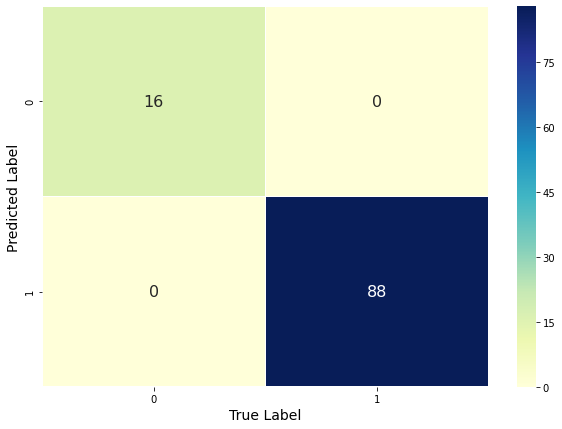

In [40]:
plt.figure(figsize = (10,7))
sns.heatmap(cmatrix_cv, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="YlGnBu")
plt.xlabel('True Label', size = 14)
plt.ylabel('Predicted Label', size =14)

In [41]:
pred_Y_test = modelo.predict(test_X)  

In [42]:
cmatrix_ve= confusion_matrix(pred_Y_test,test_Y)
print(cmatrix_ve) 
print(classification_report(test_Y,pred_Y_test))  

[[14  0]
 [ 2 16]]
              precision    recall  f1-score   support

          -1       1.00      0.88      0.93        16
           1       0.89      1.00      0.94        16

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



Text(69.0, 0.5, 'Predicted Label')

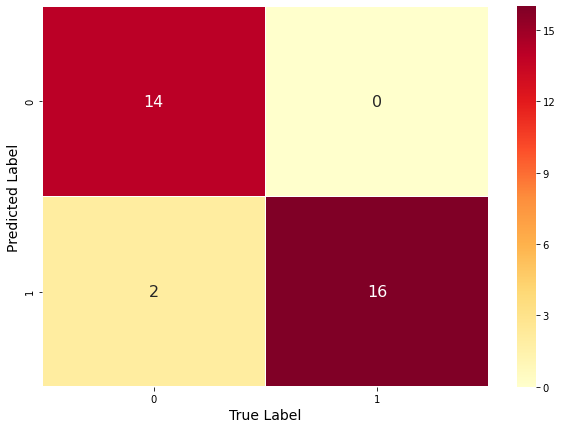

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(cmatrix_ve, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="YlOrRd")
plt.xlabel('True Label', size = 14)
plt.ylabel('Predicted Label', size =14)

In [44]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_Y, pred_Y_test))

Accuracy: 0.9375


In [45]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_Y, pred_Y_test))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_Y, pred_Y_test))

Precision: 0.8888888888888888
Recall: 1.0


## ROC AUC

In [49]:
auc= roc_auc_score(pred_Y_test, test_Y)

In [50]:
auc

0.9444444444444444

What do you think of the performance of the SVM? We can also adjust gamma to account for overfitting, but it doesn't look like we've overfit too much given the training and test performances.

Remember that support vectors are the data points that lie closest to the decision surface (or hyperplane). We can figure out what those data points are below for each class we are classifying, noting that we have three classes for negative, neutral, and positive.

In [46]:
print(modelo.support_vectors_)

[[-1.56678103 -1.45542653 -1.38217636 ...  0.10867658 -0.11026569
  -0.42425628]
 [-1.62739818 -1.6052112  -1.57741631 ... -0.41324352 -0.43911133
  -0.41457209]
 [-1.67806617 -1.65652346 -1.63221809 ... -0.27490256 -0.31220059
  -0.3074096 ]
 ...
 [-1.60013695 -1.58664474 -1.5693792  ... -0.35246887 -0.37947776
  -0.36262933]
 [-1.33727104 -1.37573402 -1.3766794  ...  0.02835206 -0.01809828
  -0.01721961]
 [-1.25329756 -1.29614479 -1.31534591 ...  0.14236397  0.11760768
   0.11968806]]


We can check for the number of points in each class using another function. Here we see that most support vectors are in our last class, the positive class.

In [47]:
modelo.n_support_

array([7, 6])

We can also find the support vector in our original data using the indices provided for us with clf.support_

In [48]:
modelo.support_

array([ 4,  9, 10, 11, 12, 22, 23, 14, 16, 17, 18, 35, 75])

In [49]:
print(train_X)

          0         1         2         3         4         5         6    \
0   -1.382007 -1.307953 -1.259545 -1.232319 -1.221773 -1.223433 -1.231915   
1   -1.447675 -1.397598 -1.358394 -1.329505 -1.310324 -1.300272 -1.301792   
2   -1.531896 -1.424441 -1.352119 -1.309314 -1.290405 -1.289755 -1.302770   
3   -1.551253 -1.442767 -1.369911 -1.326980 -1.308260 -1.308047 -1.322679   
4   -1.566781 -1.455427 -1.382176 -1.340432 -1.323597 -1.325081 -1.332401   
..        ...       ...       ...       ...       ...       ...       ...   
99  -1.305277 -1.273865 -1.249948 -1.231640 -1.217002 -1.204151 -1.188198   
100 -1.469019 -1.446885 -1.426520 -1.407249 -1.388394 -1.369292 -1.353063   
101 -1.319445 -1.303401 -1.280268 -1.251943 -1.220314 -1.187245 -1.145865   
102 -1.445660 -1.467366 -1.469359 -1.455057 -1.427839 -1.391101 -1.349482   
103 -1.319010 -1.277412 -1.253819 -1.242916 -1.239354 -1.237795 -1.226903   

          7         8         9    ...       510       511       512  \
0  

gráfico

In [50]:

#plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


In [51]:
 # View probabilities  entrenamiento SVM polinomial:
probas = modelo.predict_proba(train_X)
n_classes = np.unique(y_train_pred).size


In [52]:
len(probas)

104

In [53]:
prob_modelo = list()
for k in range(len(probas)):
    if (probas[k][1]>probas[k][0]):
        prob_modelo.append(probas[k][1])
    else:
        prob_modelo.append(probas[k][1])
print(prob_modelo)
                   
len(prob_modelo)                   
                   
               
    

[0.0010782899580746178, 0.01212573398950906, 0.060855322261242205, 0.040792113213800614, 0.07270736791098664, 0.021436541509262667, 0.023596233669808637, 0.0026872167683835045, 0.06608965880851259, 0.24311922479389658, 0.10938269332845034, 0.07276825593419428, 0.09561368325481542, 0.9649549240022198, 0.595455617082784, 0.9999852555086794, 0.9081284318315652, 0.7447865340760095, 0.8074401321563591, 0.9924904967805583, 0.9147985081221248, 0.052417882185480776, 0.07267800217429665, 0.38147741583600925, 0.9999998467522039, 0.9999834918487643, 0.9999999999215512, 0.965725674098116, 0.9973730862322083, 0.9817757170921757, 0.9999887650459705, 0.9930649246414766, 0.9999979097838727, 0.9999999623497563, 0.9383729992561244, 0.9081461129018088, 0.9999994962271151, 0.9967000537639215, 0.9608456994403933, 0.9999990145681832, 0.9999999048493533, 0.9954622663888706, 0.9902105691600532, 0.9846153991725998, 0.9718379822342654, 0.9082318001569568, 0.9999995672115808, 0.9999983348544316, 0.99661833558134

104

In [54]:

sev=datos2b[1]
severity = list()
for k in range(len(sev)):
    if (sev[k]==0):
        severity.append("Healthy")
    else:
        if (sev[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    
       
print(severity)


['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Sev 1', 'Pre-symp', 'Sev 1', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Healthy', 'Healthy', 'Healthy', 'Sev 1', 'Sev 1', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Pre-symp', 'Sev 1', 'Pre-symp', 'Sev 1', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Sev 1', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Sev 2', 'Sev 1', 'Pre-symp', 'Sev 1', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 2', '

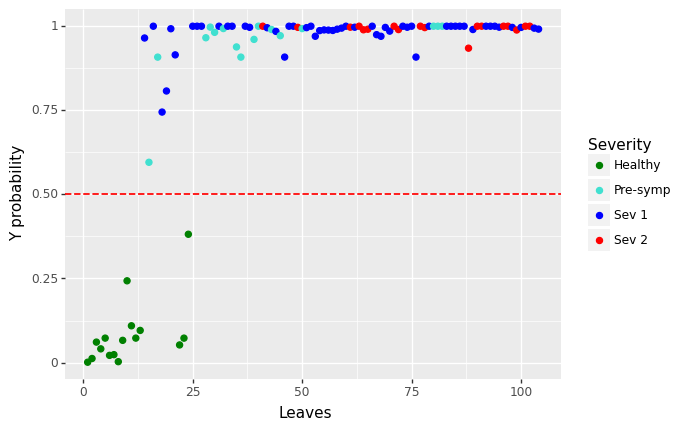

<ggplot: (30268686747)>


In [55]:
x=range(1,105)

df = pd.DataFrame({"Leaves":x, "Y probability":prob_modelo, 'Severity':severity})

g= ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)

#scale_colour_brewer(type="qual", palette= "Set1") + \

In [231]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm1_prob1.png")

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm1_prob1.png


In [122]:
#probatilidad en validacion externa


104

### test 

In [56]:
 # View probabilities  entrenamiento :
probas1 = modelo.predict_proba(test_X)
probas1

array([[9.99108492e-01, 8.91508108e-04],
       [9.90897162e-01, 9.10283832e-03],
       [9.53653569e-01, 4.63464312e-02],
       [9.19612706e-01, 8.03872937e-02],
       [9.53548642e-01, 4.64513583e-02],
       [9.83368972e-01, 1.66310283e-02],
       [9.73577433e-01, 2.64225672e-02],
       [9.97367024e-01, 2.63297563e-03],
       [6.83727336e-01, 3.16272664e-01],
       [8.34586901e-01, 1.65413099e-01],
       [7.64097474e-01, 2.35902526e-01],
       [9.39544617e-01, 6.04553826e-02],
       [4.51463951e-02, 9.54853605e-01],
       [9.22720237e-01, 7.72797635e-02],
       [2.42371600e-02, 9.75762840e-01],
       [9.27683299e-01, 7.23167007e-02],
       [2.61855234e-10, 1.00000000e+00],
       [1.11125070e-01, 8.88874930e-01],
       [6.61446961e-03, 9.93385530e-01],
       [2.97209897e-02, 9.70279010e-01],
       [5.60242961e-03, 9.94397570e-01],
       [6.11242502e-03, 9.93887575e-01],
       [2.65229034e-03, 9.97347710e-01],
       [1.84448830e-02, 9.81555117e-01],
       [1.675513

In [57]:
prob_test = list()
for k in range(len(probas1)):
    if (probas1[k][1]>probas1[k][0]):
        prob_test.append(probas1[k][1])
    else:
        prob_test.append(probas1[k][1])
print(prob_test)
                   
len(prob_test)                   
                   

[0.0008915081084424868, 0.009102838323549694, 0.04634643118905553, 0.08038729373793906, 0.046451358328403004, 0.01663102831959414, 0.026422567175592968, 0.002632975634378088, 0.3162726637014972, 0.16541309855563552, 0.23590252583369778, 0.06045538264658708, 0.9548536048758558, 0.07727976346128583, 0.9757628400289563, 0.07231670066792746, 0.9999999997381448, 0.8888749298963893, 0.9933855303853436, 0.9702790102720703, 0.994397570391017, 0.9938875749772843, 0.9973477096578359, 0.981555116989489, 0.9999999983244866, 0.9999917353836365, 0.9855024219725821, 0.9899094373125056, 0.9848489196732372, 0.9958675092378543, 0.9999915471232734, 0.9999990191535022]


32

In [58]:

sev1=datos_add[1]
severity = list()
for k in range(len(sev1)):
    if (sev1[k]==0):
        severity.append("Healthy")
    else:
        if (sev1[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev1[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    
       
print(len(severity))
x=range(1,33)
x

32


range(1, 33)

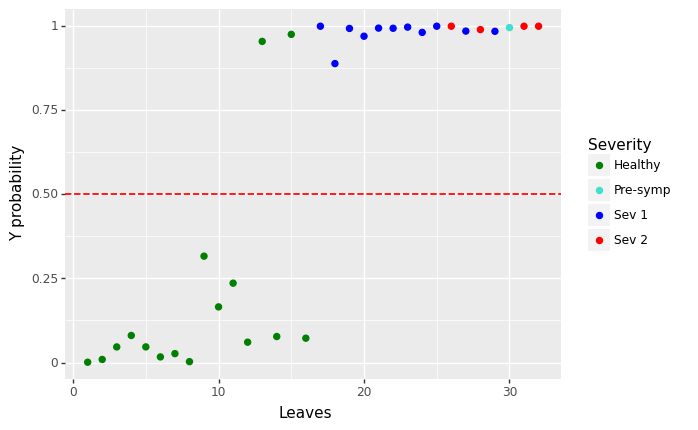

<ggplot: (-9223372006585394281)>


In [59]:


df = pd.DataFrame({"Leaves":x, "Y probability":prob_test, 'Severity':severity})

g= ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)

#scale_colour_brewer(type="qual", palette= "Set1") + \

In [60]:
df

,Leaves,Y probability,Severity
0,1,0.000892,Healthy
1,2,0.009103,Healthy
2,3,0.046346,Healthy
3,4,0.080387,Healthy
4,5,0.046451,Healthy
5,6,0.016631,Healthy
6,7,0.026423,Healthy
7,8,0.002633,Healthy
8,9,0.316273,Healthy
9,10,0.165413,Healthy


In [240]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm1_prob2.png")

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm1_prob2.png


## Non-linear SVM

We can also check different kernel types, with rbf being gaussian and sigmoid being similar to the sigmoid function in logistic regression. A visualization is simplest to understand below:

<img src="svm shapes.png">

In [51]:
modelo_poly = svm.SVC(kernel='poly', C=91, probability = True)  
#modelo_poly = svm.SVC(kernel='poly', C=1, class_weight={-1:3})  
modelo_poly.fit(train_X, train_Y)

SVC(C=91, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
y_train_pred = modelo_poly.predict(train_X)  

In [53]:
cmatrix_cv_poly=confusion_matrix(y_train_pred, train_Y)
print(cmatrix_cv_poly) 
print(classification_report(train_Y,y_train_pred))  

[[16  0]
 [ 0 88]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        88

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



Text(69.0, 0.5, 'Predicted Label')

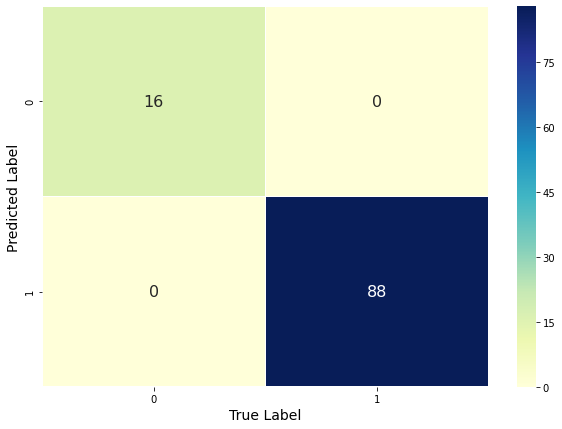

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(cmatrix_cv_poly, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="YlGnBu")
plt.xlabel('True Label', size = 14)
plt.ylabel('Predicted Label', size =14)

In [55]:
y_pred_test2 = modelo_poly.predict(test_X)  

In [56]:
cmatrix_ve_poly=confusion_matrix(y_pred_test2,test_Y)
print(cmatrix_ve_poly) 
print(classification_report(test_Y,y_pred_test2))  

[[14  0]
 [ 2 16]]
              precision    recall  f1-score   support

          -1       1.00      0.88      0.93        16
           1       0.89      1.00      0.94        16

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



Text(69.0, 0.5, 'Predicted Label')

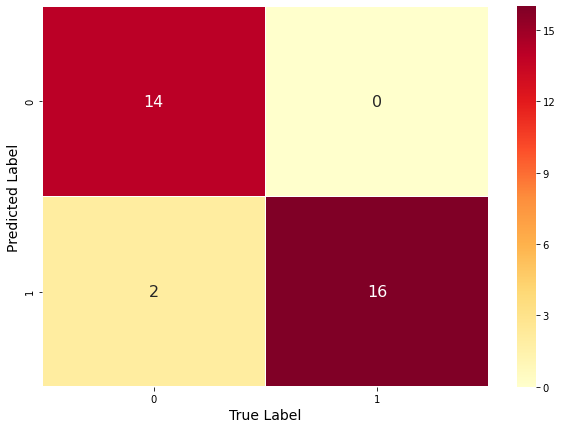

In [57]:
plt.figure(figsize = (10,7))
sns.heatmap(cmatrix_ve_poly, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="YlOrRd")
plt.xlabel('True Label', size = 14)
plt.ylabel('Predicted Label', size = 14)

In [58]:
 #Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_Y, pred_Y_test))

Accuracy: 0.9375


In [59]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_Y, pred_Y_test))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_Y, pred_Y_test))

Precision: 0.8888888888888888
Recall: 1.0


## roc auc

In [60]:
auc= roc_auc_score(pred_Y_test, test_Y)

In [61]:
auc

0.9444444444444444

In [ ]:
print(accuracy_score(y_test,y_pred))

It looks like the linear SVM performs best on this model from both a precision and recall perspective. Remember that precision are the accuracy of the prediction and recall is how much of the true positive space we are capturing. 

What does this mean about our underlying data?

Source: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/, https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html, https://gist.github.com/WittmannF/60680723ed8dd0cb993051a7448f7805

In [218]:
# View probabilities  entrenamiento SVM polinomial:
probas = modelo_poly.predict_proba(train_X)
n_classes = np.unique(y_train_pred).size


In [219]:
prob_modelo2 = list()
for k in range(len(probas)):
    if (probas[k][1]>probas[k][0]):
        prob_modelo2.append(probas[k][1])
    else:
        prob_modelo2.append(probas[k][1])
print(prob_modelo2)
                   
len(prob_modelo2) 

[0.0029908055169558653, 0.02400188680999118, 0.08898722486855538, 0.06136981136771408, 0.09029643063705867, 0.04692370471450089, 0.04694740889217647, 0.006675226819519981, 0.09027337998266212, 0.26878003146048585, 0.17294902408730595, 0.09032355714948037, 0.1403513205641658, 0.9412415593145076, 0.5518709203668478, 0.99317862254359, 0.8619158592885725, 0.6638264150674907, 0.7452799770089352, 0.9803647414916105, 0.864330819500921, 0.06041479439952317, 0.0904209988346799, 0.5441891392506747, 0.9999983441351391, 0.9967959843858001, 0.999999996579254, 0.9704236001867831, 0.9956686278001882, 0.9820579988079912, 0.9964253732624665, 0.9920326496863043, 0.9999893308902822, 0.9999995101316179, 0.9564376934470645, 0.9353485371866832, 0.9999967166892832, 0.9939201572811583, 0.961778145902803, 0.999991013097017, 0.9999990111257653, 0.9928355321992414, 0.9855155723082478, 0.9819180334672037, 0.9731791525331789, 0.9455112592905318, 0.999997330015757, 0.9999919519973971, 0.9949430466834633, 0.99064628

104

In [220]:

sev=datos2b[1]
severity = list()
for k in range(len(sev)):
    if (sev[k]==0):
        severity.append("Healthy")
    else:
        if (sev[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    
       
print(severity)
len(severity)

['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Sev 1', 'Pre-symp', 'Sev 1', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Healthy', 'Healthy', 'Healthy', 'Sev 1', 'Sev 1', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Pre-symp', 'Sev 1', 'Pre-symp', 'Sev 1', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Sev 1', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Sev 2', 'Sev 1', 'Pre-symp', 'Sev 1', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Pre-symp', 'Pre-symp', 'Pre-symp', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 2', '

104

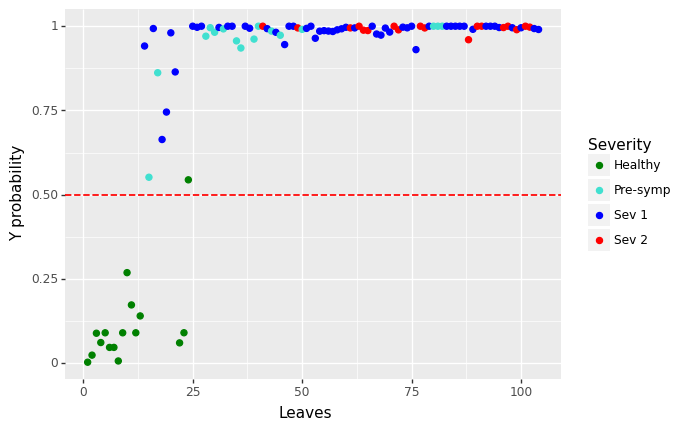

<ggplot: (-9223372021085651182)>


In [221]:
x=range(1,105)

df = pd.DataFrame({"Leaves":x, "Y probability":prob_modelo2, 'Severity':severity})

g= ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)

#scale_colour_brewer(type="qual", palette= "Set1") + \

In [222]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm2_prob1.png")

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm2_prob1.png


In [212]:
# View probabilities SVM polinomial
probas = modelo_poly.predict_proba(test_X)
n_classes = np.unique(y_train_pred).size

In [213]:
prob_modelo2 = list()
for k in range(len(probas)):
    if (probas[k][1]>probas[k][0]):
        prob_modelo2.append(probas[k][1])
    else:
        prob_modelo2.append(probas[k][1])
print(prob_modelo2)
                   
len(prob_modelo2) 

[0.002532891442922759, 0.018422837604306977, 0.06808329904122142, 0.09829326001226549, 0.06014828414320949, 0.03665245651973257, 0.05128130300326664, 0.0064858094259024335, 0.34685804565589884, 0.1750306858482978, 0.2609559785280989, 0.07310501432864447, 0.9593241350476213, 0.11647781447886373, 0.9699251021852671, 0.07929699392881948, 0.9999999643849439, 0.9319434572003611, 0.991719469690229, 0.9765429124218612, 0.992078030158133, 0.9909518940453691, 0.9954820412058037, 0.9822123994152835, 0.9999999935594936, 0.9966965225470178, 0.9819995867406888, 0.987861973087448, 0.9822900640302173, 0.9942658988097873, 0.9999812070569535, 0.9999949219382221]


32

In [214]:

sev=datos_add[1]
severity = list()
for k in range(len(sev)):
    if (sev[k]==0):
        severity.append("Healthy")
    else:
        if (sev[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    
       
print(severity)

['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 1', 'Sev 2', 'Sev 1', 'Sev 2', 'Sev 1', 'Pre-symp', 'Sev 2', 'Sev 2']


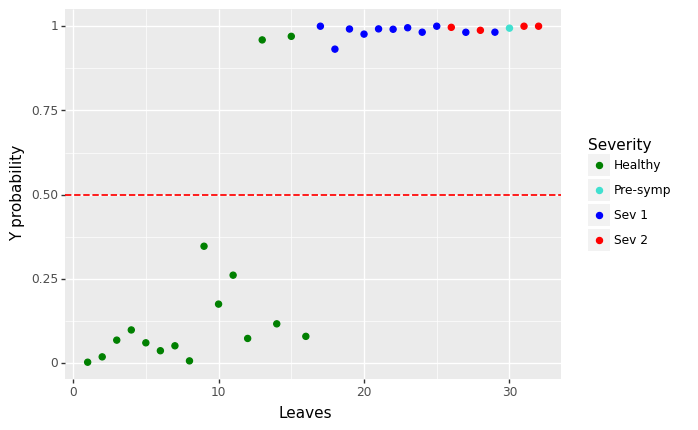

<ggplot: (-9223372021085493223)>


In [215]:
x=range(1,33)

df = pd.DataFrame({"Leaves":x, "Y probability":prob_modelo2, 'Severity':severity})

g= ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)


In [217]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm2_prob2.png")

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_svm2_prob2.png
